<a href="https://colab.research.google.com/github/jermanalopes/MachineLearningBasic/blob/main/LinearRegression_bibs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import Libs
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.formula.api as sm
import scipy.stats as stats
import seaborn as sns


In [4]:
# Read and Organize Data
cars = pd.read_csv('mt_cars.csv')
cars.shape
cars.head()
cars = cars.drop(['Unnamed: 0'], axis = 1)
cars.head()


,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


<Axes: >

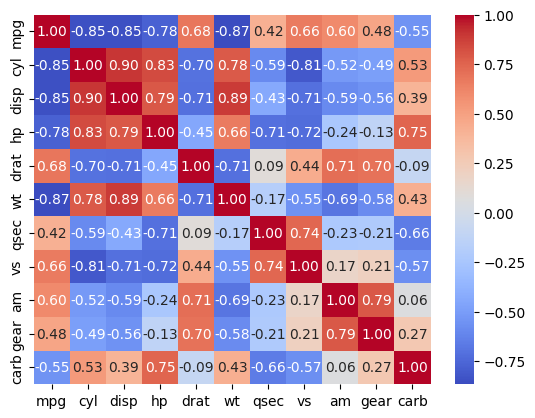

In [5]:
# Correlation
corr_cars = cars.corr()
sns.heatmap(corr_cars, cmap='coolwarm', annot=True, fmt='.2f')


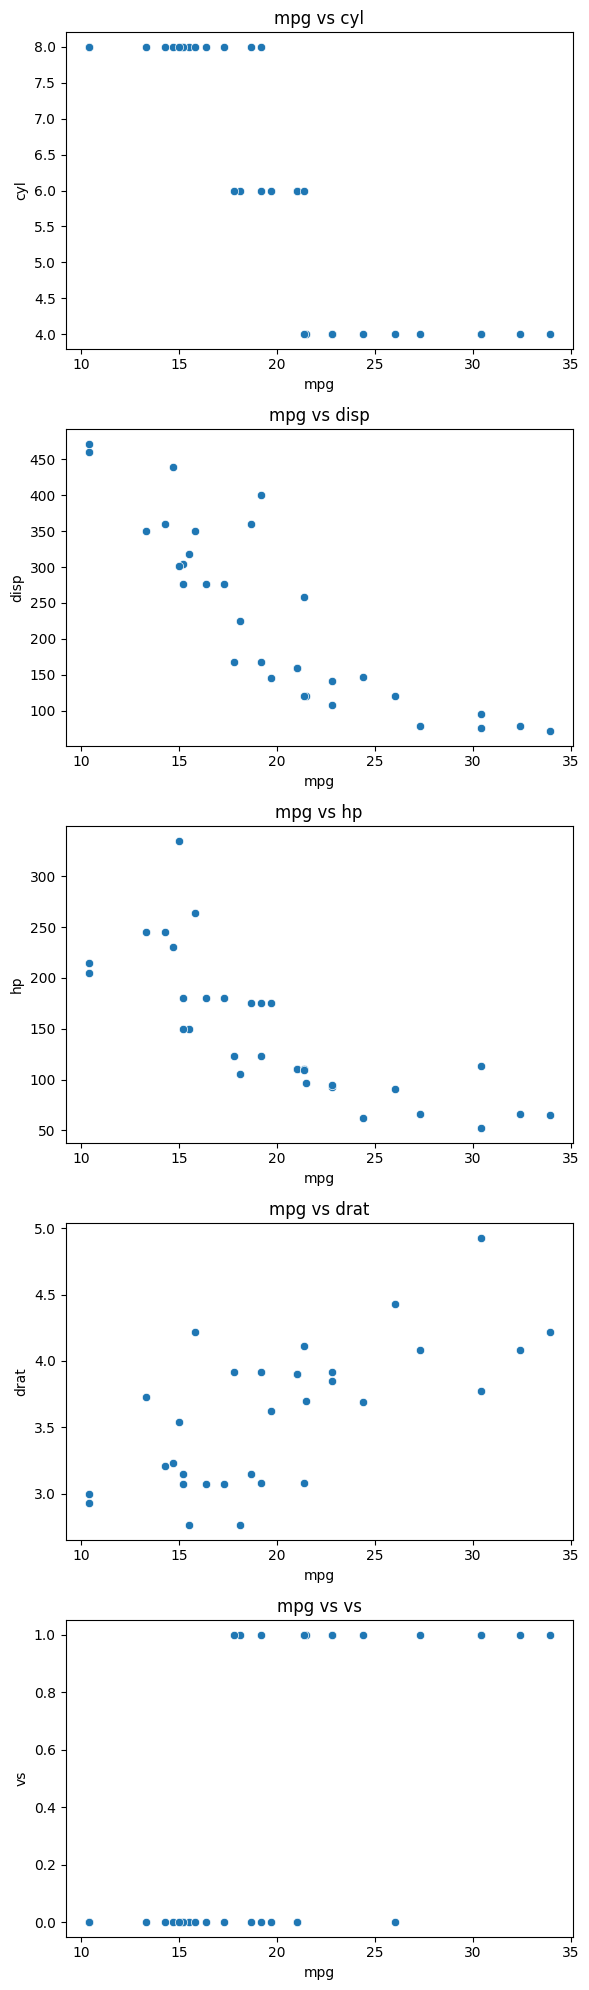

In [6]:
# Pair analysis
column_pairs = [('mpg', 'cyl'), ('mpg', 'disp'),('mpg', 'hp'),('mpg', 'drat'),('mpg', 'vs')]
n_plots = len(column_pairs)
fig, axes = plt.subplots(nrows=n_plots, ncols=1, figsize=(6,4 * n_plots))

for i, pair in enumerate(column_pairs):
    x_col, y_col = pair
    sns.scatterplot(x=x_col, y=y_col, data=cars, ax=axes[i])
    axes[i].set_title(f'{x_col} vs {y_col}')

plt.tight_layout()
plt.show()




In [19]:
#aic=156.6 e bic=162.5
#modelo = sm.ols(formula='mpg ~ wt + disp + hp', data=cars)

#aic=165.1 e bic=169.5
#modelo = sm.ols(formula='mpg ~ disp + cyl', data=cars)

#aic=179.1 e bic=183.5
modelo = sm.ols(formula='mpg ~ drat + vs', data=cars)
modelo = modelo.fit()
modelo.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.628
Model:                            OLS   Adj. R-squared:                  0.603
Method:                 Least Squares   F-statistic:                     24.53
Date:                Wed, 03 Apr 2024   Prob (F-statistic):           5.82e-07
Time:                        14:54:45   Log-Likelihood:                -86.536
No. Observations:                  32   AIC:                             179.1
Df Residuals:                      29   BIC:                             183.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.8253      4.903     -0.372      0.712     -11.853       8.202
drat           5.4365      1.421      3.826      0.001       2.530       8.343
vs             5.4013      1.507      3.583      0.001       2.318       8.484
==============================================================================
Omnibus:                        0.243   Durbin-Watson:                   1.890
Prob(Omnibus):                  0.886   Jarque-Bera (JB):                0.440
Skew:                           0.059   Prob(JB):                        0.803
Kurtosis:                       2.438   Cond. No.                         29.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

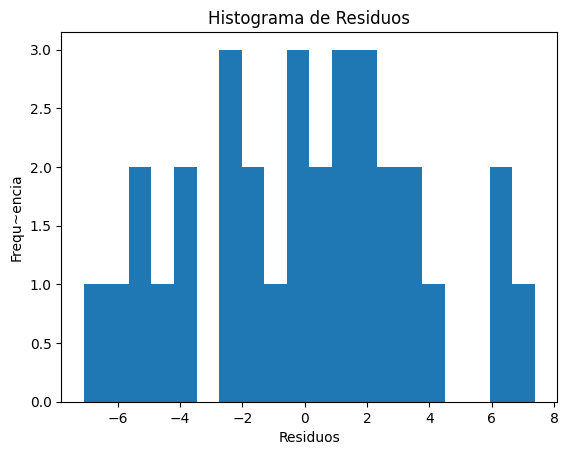

In [20]:
residuos = modelo.resid
plt.hist(residuos, bins=20)
plt.xlabel("Residuos")
plt.ylabel("Frequ~encia")
plt.title("Histograma de Residuos")
plt.show()

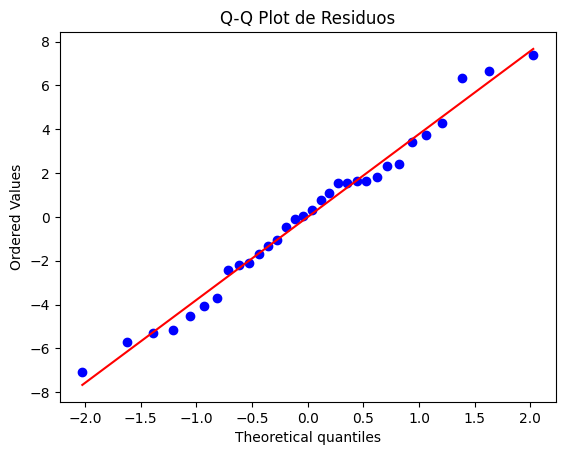

In [21]:
stats.probplot(residuos, dist="norm", plot=plt)
plt.title("Q-Q Plot de Residuos")
plt.show()

In [22]:
# h0 - Dados estão normalmente distribuidos
# se p <= 0.05 rejeito h0 (não estão normalmente distribuidos)
# se p > 0.05 não é possível rejeitar h0
stat, pval = stats.shapiro(residuos)
print(f'Shapiro-Wilk statistic: {stat:.3f}, pvalue: {pval:.3f}')

Shapiro-Wilk statistic: 0.981, pvalue: 0.822
